# Air Passenger Satisfaction Using ANN

## Introduction

###### This is a model that predicts the satisfaction of passengers travelling in flights from a survey that was conducted in the US. The data was gathered from Kaggle. More than the creating the model, the main area of focus is to determine what are the features that drive customer satisfaction.

We can see in the dataset that there are passengers who are have travelled in three classes; the Eco Class,Eco Plus and the Business Class. As per their travel experience, they have rated their experience, they have rated their  journey on the scale of 0-5 for various categories like Inflight Entertainment, Ease of Online Booking, On-Board Service, Checkin Service, Convenience of Departure and Arrival timings and more. The main column that we look out for in this is the satisfaction which has two types; one for the passengers who are satisfied and the other for those who are dissatisfied or are neutral about their flight journey experience.

# Imporing the libraries and Data Preprocessing

In [1]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset and checking the first 5 entries
df = pd.read_csv('Air_Passengers.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#Dropping the Unnamed: 0 column as it has no significance on the dataset
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
#Checking for null values and we can see that there are a few null values which will be filled up later
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Here, satisfaction has two types, one is neutral or dissatisfied and the other satisfied. It will be replaced with 0 for neutral or dissatisfied and 1 for satisfied as a machinelearning model only takes in numerical values. There are other categorical variables in the dataset which  will be replaced with numerical values later.

In [9]:
df['satisfaction'].replace({'neutral or dissatisfied' : 0, 'satisfied' : 1},inplace=True)

In [10]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [11]:
#The Arrival Delay in Minutes has a few missing values and it is filled with the mean.
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

### Checking for Imbalance

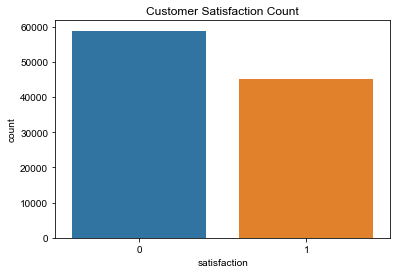

In [12]:
plt.figure()
sns.countplot(x='satisfaction',data=df)
plt.title('Customer Satisfaction Count')
sns.set_style('ticks')

The data is balanced well between the two categories and hence no balancing of data is required for this dataset.

# Exploratory Data Analysis

Text(0.5, 1.0, 'Customer Satisfaction Based on Gender')

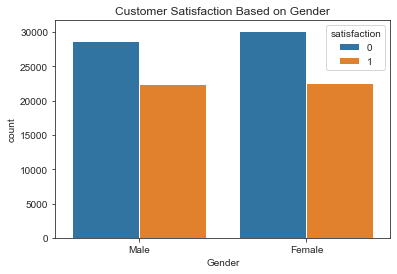

In [13]:
sns.countplot(x='Gender',data=df,hue='satisfaction')
plt.title('Customer Satisfaction Based on Gender')

The number of satisfied customers for both male and  female is almost the same but we can see that for both of them, the number of dissatisfied or neutral customers are on the higher side.

Text(0.5, 1.0, 'Age vs Passenger Satisfaction')

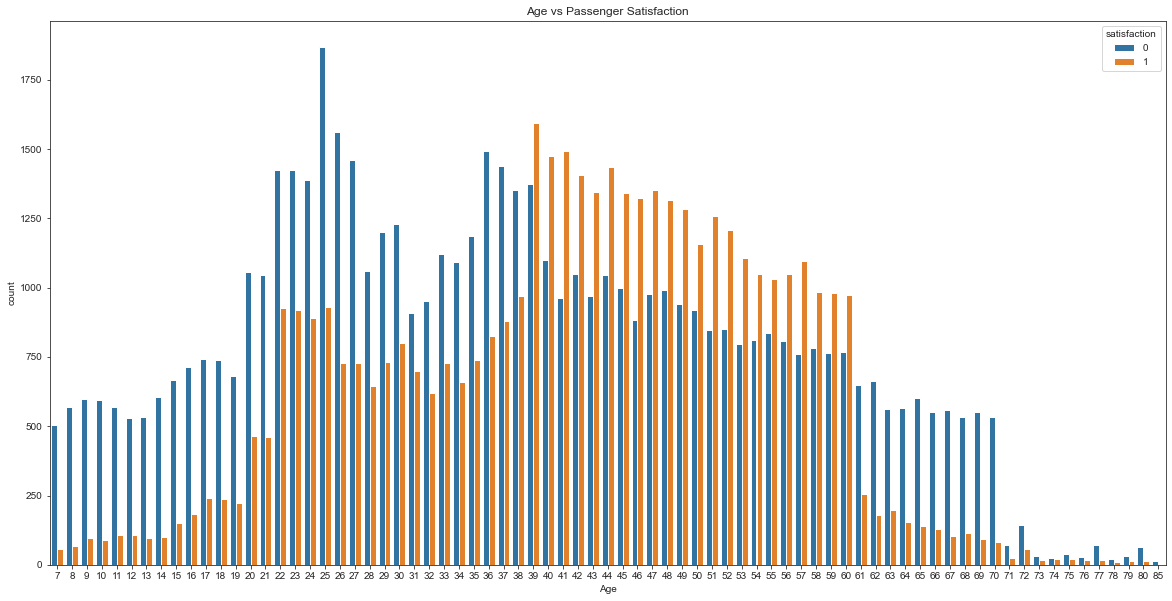

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',data=df,hue='satisfaction')
plt.title('Age vs Passenger Satisfaction')

There are a lot of passengers aged between 7-39 and 60-70 who seem to dissatisfied and the airline companies may have to look into ways in which they can make the journey satisfactory for this group of passengers.

Text(0.5, 1.0, 'Customer Satisfaction Based on Class')

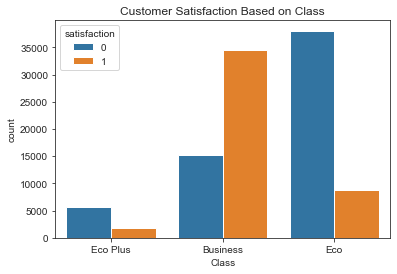

In [15]:
sns.countplot(x='Class',data=df,hue='satisfaction')
plt.title('Customer Satisfaction Based on Class')

Here, we can see that there is a high number of neutral or dissatisfied customers in the Economy Class compared to the Eco Plus and Business Classes. The Eco Plus Class also has a lot of dissatisfied or neutral passengers compared to the satisfied.

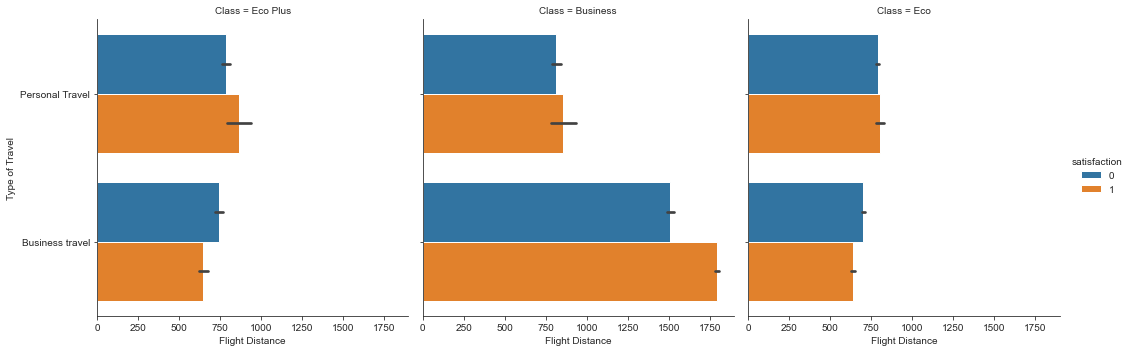

In [16]:
g = sns.catplot(x='Flight Distance',y='Type of Travel',hue='satisfaction',col='Class',data=df,kind='bar')

There are a lot of satisfied customers who are travelling long distances for the Business purposes in Business Class. There is also has a high number of neutral or dissatisfied customers.

For the rest, the ratio seems to be almost equal.

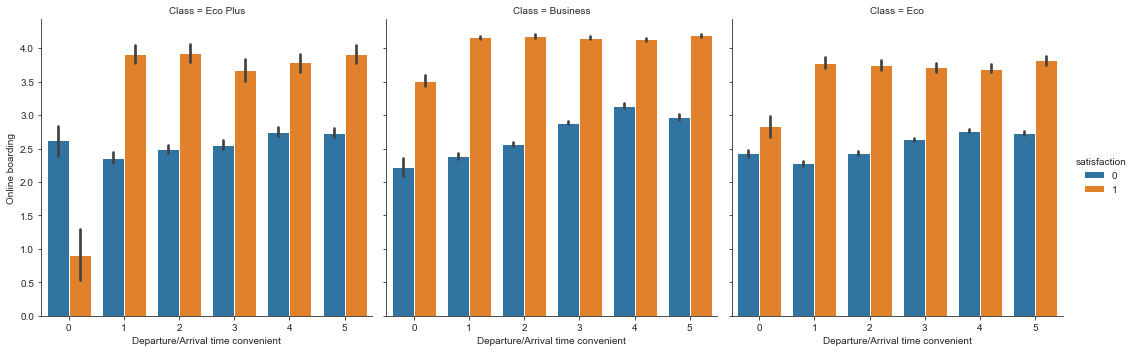

In [17]:
g = sns.catplot(x='Departure/Arrival time convenient',y='Online boarding',hue='satisfaction',col='Class',data=df,kind='bar')

It looks like the number of neutral or dissatisfied passengers are more than the satisfied passengers for Eco Plus Class with Departure/Arrival Time Convenient=0 despite the online boarding. The airline may have to look at these and make sure to improve their services.

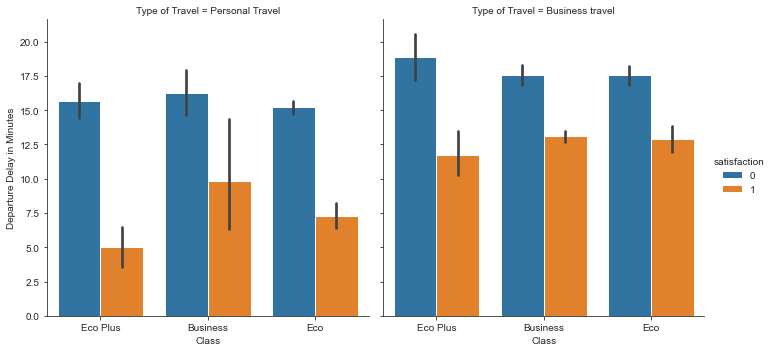

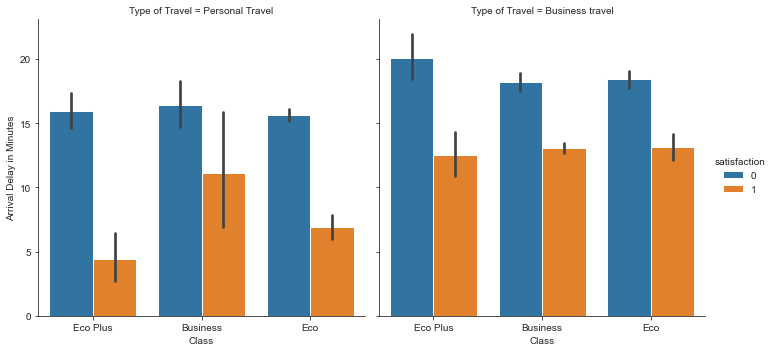

In [18]:
g = sns.catplot(x='Class',y='Departure Delay in Minutes',hue='satisfaction',col='Type of Travel',data=df,kind='bar')

g = sns.catplot(x='Class',y='Arrival Delay in Minutes',hue='satisfaction',col='Type of Travel',data=df,kind='bar')

No one is happy when their flight gets delayed or arrives late. But, when we look at the plots, we can see that there are a lot of dissatisfied or neutral customers compared to the satisfied customers for those who are travelling in Eco Plus class and are are on a Personal Travel.

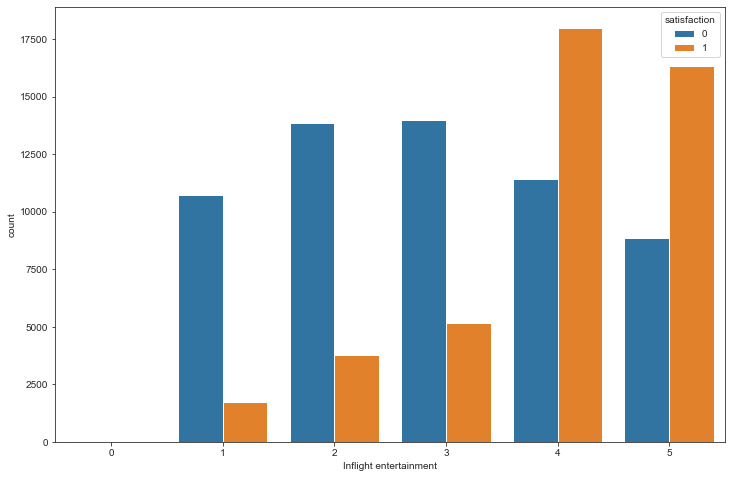

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x='Inflight entertainment',data=df,hue='satisfaction')

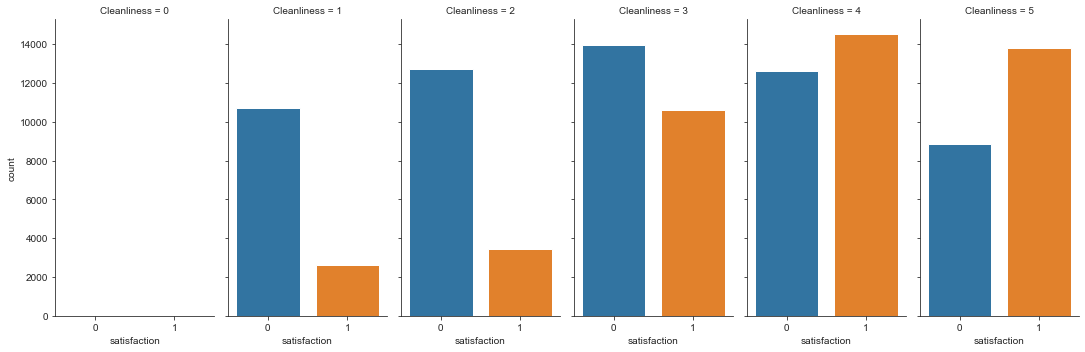

In [20]:
g = sns.catplot('satisfaction',col='Cleanliness',data=df,kind='count',aspect=0.5)

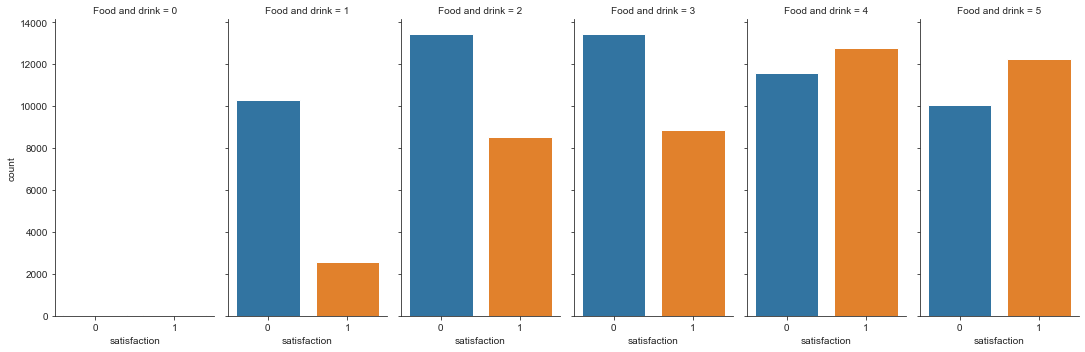

In [21]:
g = sns.catplot('satisfaction',col='Food and drink',data=df,kind='count',aspect=0.5)

For the Inflight Entertainment, Food and drink as well and Cleanliness columns, the ratings are given on the scale of 0-5. The satisfied customers belong to the ones who have rated 4 and 5 and most of the dissatisfied or neutral customers have given a rating below 4. 

### Label Encoding for the Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
#df.info()

In [25]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('satisfaction',axis=1).values
y = df['satisfaction'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

### Scaling the values

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

# Building an Artifical Neural Network(ANN) Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [36]:
X_train.shape

(72732, 23)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [39]:
model = Sequential()

# Input layer
model.add(Dense(units=23,activation='relu'))

# First Hidden Layer
model.add(Dense(units=10,activation='relu'))

# Second Hidden Layer
model.add(Dense(units=5,activation='relu'))

# Output Layer will have just one neuron as it is a binary classification and will output one 0 or 1 class
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem, the loss function that is used is binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
results = model.fit(x=X_train,y=y_train,epochs=600,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.2754 - val_loss: 0.1721
Epoch 2/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1562 - val_loss: 0.1778
Epoch 3/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1416 - val_loss: 0.1363
Epoch 4/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1344 - val_loss: 0.1525
Epoch 5/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1313 - val_loss: 0.1288
Epoch 6/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1277 - val_loss: 0.1278
Epoch 7/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1237 - val_loss: 0.1189
Epoch 8/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.1220 - val_loss: 0.1169
Epoch 9/600
2273/2273 [==============================] - 6s 3ms/step - loss: 0.1200 - val_loss: 0.1202
Epoch 10/600
2273/2273 [==============================] - 8s 3ms/step - l

Epoch 80/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.0898 - val_loss: 0.0948
Epoch 81/600
2273/2273 [==============================] - 5s 2ms/step - loss: 0.0897 - val_loss: 0.0957
Epoch 82/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.0895 - val_loss: 0.0981
Epoch 83/600
2273/2273 [==============================] - 5s 2ms/step - loss: 0.0895 - val_loss: 0.0944
Epoch 84/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.0892 - val_loss: 0.0945
Epoch 85/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.0891 - val_loss: 0.1111
Epoch 86/600
2273/2273 [==============================] - 4s 2ms/step - loss: 0.0898 - val_loss: 0.1008
Epoch 87/600
2273/2273 [==============================] - 5s 2ms/step - loss: 0.0893 - val_loss: 0.0945
Epoch 88/600
2273/2273 [==============================] - 5s 2ms/step - loss: 0.0896 - val_loss: 0.0964
Epoch 89/600
2273/2273 [==============================] - 4s 2ms

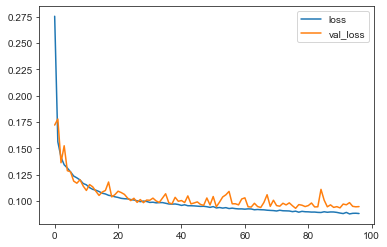

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [42]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17649
           1       0.96      0.95      0.95     13523

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172

[[17106   543]
 [  700 12823]]


#### We can see that the ANN model also gives good results and this can also be used to make predictions.